In [2]:
today_date = datetime.datetime.today()

In [3]:
today_date

datetime.datetime(2023, 9, 28, 21, 5, 52, 232166)

In [4]:
today_date-datetime.timedelta(1)

datetime.datetime(2023, 9, 27, 21, 5, 52, 232166)

In [5]:
## list comprehensiion of 7 days.
days = [today_date-datetime.timedelta(x) for x in range(15)]

In [6]:
import pandas as pd
data = pd.DataFrame(days,columns=['Day'])

In [7]:
data.head()

,Day
0,2023-09-28 21:05:52.232166
1,2023-09-27 21:05:52.232166
2,2023-09-26 21:05:52.232166
3,2023-09-25 21:05:52.232166
4,2023-09-24 21:05:52.232166


In [8]:
data['Weekday'] = data['Day'].dt.strftime("%A")
data.head()

,Day,Weekday
0,2023-09-28 21:05:52.232166,Thursday
1,2023-09-27 21:05:52.232166,Wednesday
2,2023-09-26 21:05:52.232166,Tuesday
3,2023-09-25 21:05:52.232166,Monday
4,2023-09-24 21:05:52.232166,Sunday


In [9]:
data['Day'].dt.minute.head()

0    5
1    5
2    5
3    5
4    5
Name: Day, dtype: int32

In [10]:
data['Weekday_ordinal'] = [x+1 for x in data['Day'].dt.weekday]
data.head()

,Day,Weekday,Weekday_ordinal
0,2023-09-28 21:05:52.232166,Thursday,4
1,2023-09-27 21:05:52.232166,Wednesday,3
2,2023-09-26 21:05:52.232166,Tuesday,2
3,2023-09-25 21:05:52.232166,Monday,1
4,2023-09-24 21:05:52.232166,Sunday,7


Count or Frequrency Encoding.

In [11]:
train_set = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
columns = [1,3,5,6,7,8,9,13]
train_set = train_set[columns]
train_set.columns = ['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [13]:
for col in train_set.columns:
    print(f'Feature-{col}: {len(train_set[col].unique())} labels')

Feature-Employment: 9 labels
Feature-Degree: 16 labels
Feature-Status: 7 labels
Feature-Designation: 15 labels
Feature-family_job: 6 labels
Feature-Race: 5 labels
Feature-Sex: 2 labels
Feature-Country: 42 labels


In [14]:
country_map = train_set['Country'].value_counts().to_dict()

In [15]:
train_set['Country'] = train_set.Country.map(country_map)

In [16]:
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95


#### Advantages
1. Easy to use.
2. We are not increasing any feature space.
#### Disadvantages.
1. it will provide same weight if there frequency are same.


### Target Guided ordinal Encoding.
1. Ordering the labels according to targets.
2. Replace the labels by joint probablity of being 1 or 0.

In [38]:
import pandas as pd
df = pd.read_csv('titanic.csv', usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [39]:
df['Cabin'].fillna('Missing',inplace=True)

In [40]:
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [41]:
df['Cabin'] = df['Cabin'].astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [42]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [47]:
ordinal_labels = df.groupby('Cabin')['Survived'].mean().sort_values().index

In [44]:
labels = {k:i for i,k in enumerate(ordinal_labels)}

In [45]:
df['Cabin_ordinal_value'] = df['Cabin'].map(labels)

In [46]:
df.head()

,Survived,Cabin,Cabin_ordinal_value
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


### Mean Encoding.


In [51]:
mean_ordinal_label = df.groupby('Cabin')['Survived'].mean().to_dict()
mean_ordinal_label

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [52]:
df['Mean_ordinal_encoding']   =  df['Cabin'].map(mean_ordinal_label)
df.head()

,Survived,Cabin,Cabin_ordinal_value,Mean_ordinal_encoding
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


### Probability Ratio Encoding.
1. find the probablity of Survived.
2. find the probabilty of not Survived.
3. find the ratio of both.
4. prepare a dictionary to map the categories.
5. replace the categories with probabilty ratio values.


Note: Used for the case for binary classification based problem.

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [3]:
df['Cabin'].fillna('Missing',inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [4]:
df['Cabin'] = df['Cabin'].astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [5]:
prob_df = df.groupby('Cabin')['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df.head()

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000


In [6]:
prob_df['Died']  = 1-prob_df['Survived']
prob_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [7]:
prob_df['prob_ratio_column'] = prob_df.Survived/prob_df.Died 
prob_df.head()

,Survived,Died,prob_ratio_column
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [12]:
method_map = prob_df.to_dict()['prob_ratio_column']
method_map

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [15]:
df['Cabin_encode'] = df['Cabin'].map(method_map)
df.head()

,Survived,Cabin,Cabin_encode
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274


#### Transformation of Features

Why we required Transformation
1. Used in Linear Regression and logitic regression ---- Gradient decent Used ---- Global Minima.
2. help full in algorithums like KNN, K-MEAN, hierarichal clustering --- Euclidian distance.
3. This is not much required in Ensemble techniques where tree concept is been used.
4. Deep learning techniques requires (Standardization and Scaling)
    1. ANN -- Global minima
    2. CNN
    3. RNN

for reducing the time in finding these parameter we specifically uses transformation.


Types of Transformation.
1. Normalization and Standardization.
2. Scaling to Minimum and Maximum.
3. Scaling to Median and Quandiles.
4. Guassian Transformation.
    * Logarithmic Transformation.
    * Reciprocal Transformation.
    * Square Root Transformation.
    * Exponential Transformation.
    * Box Cox Transformation.

##### Standardization
We try to bring all the variables or features to a similar scale. Standardization means centering the variable at zero.
z = (x-x_mean)/std.

In [1]:
import pandas as pd
df = pd.read_csv('titanic.csv',usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [2]:
df['Age'].fillna(df.Age.median(),inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [4]:
#### standardization: we use standard scalar from sklearn library.
from sklearn.preprocessing import StandardScaler

In [5]:
scalar = StandardScaler()
# fit vs fit_transform: fit use for building machine learning model becuase it only fit the model not transform the train data.
# where fit_transform fit and transform the input data at the same time, used for processing.
df_scaled = scalar.fit_transform(df)
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [6]:
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
df_scaled.head()

,Survived,Pclass,Age,Fare
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

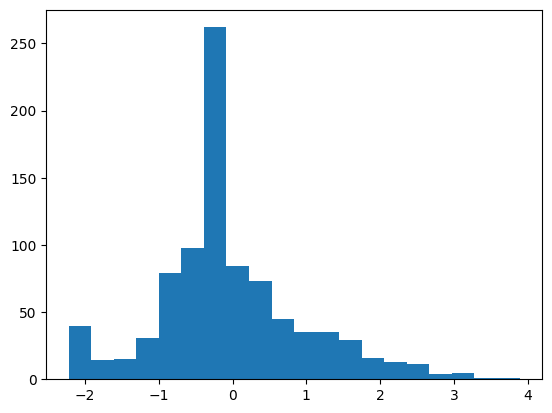

In [15]:
plt.hist(df_scaled['Age'],bins=20)

##### Min Max Scalar (Priorly used for CNN in deep learning.)
Min Max Scaling scales values between 0 to 1.
* X_scaled = (x-x_min)/(x_max-x_min)

In [16]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

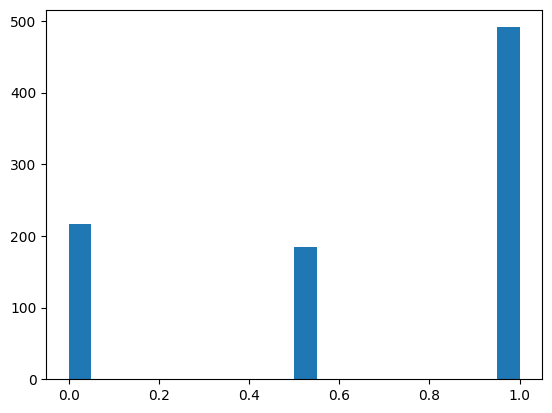

In [17]:
plt.hist(df_minmax['Pclass'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

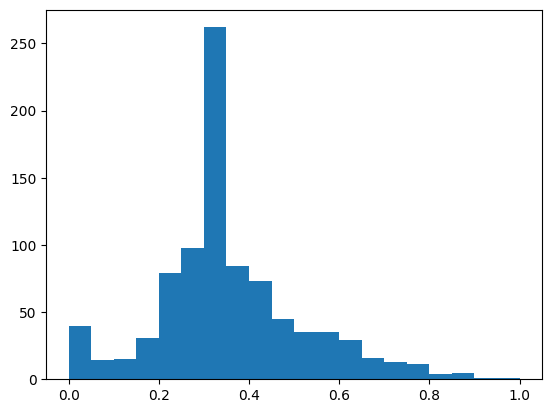

In [18]:
plt.hist(df_minmax['Age'],bins=20)

### Robust Scaler
* It is used to scale the feature to median and Quantile.
Scaling using median and Quantiles consists of substracting median to all the observations, and then divding it with inter quantile difference. The inter quantile difference is the difference btw 75th and 25th quantile.
* IQR = 75th quantile - 25 quantile
* X_scaled = (X-X_median)/IQR
* 0,1,2,3,4,5,6,7,8,9,10
* 1 - 10% percentile , 4 - 40 % percentile.

Note: This is method is immune with the outliers.





In [19]:
from sklearn.preprocessing import RobustScaler
scalar = RobustScaler()
df_robust_scalar = pd.DataFrame(scalar.fit_transform(df),columns=df.columns)
df_robust_scalar.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

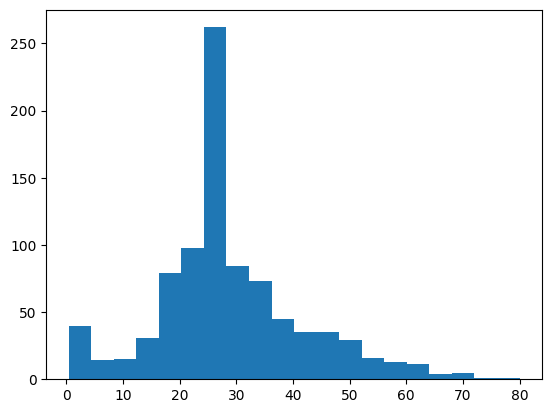

In [20]:
plt.hist(df['Age'],bins=20)

Guassian Transformation.
* Logarithmic Transformation.
* Reciprocal Transformation.
* Square Root Transformation.
* Exponential Transformation.
* Box Cox Transformation.

Note: We use this transformation to transform the data from left and right scewed to normal distribution. We form this becuase some algo like linear reg, logisitc reg work well with normally distributed.

In [3]:
df1 = df.drop('Pclass',axis=1)
df1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
import scipy.stats as stats
import pylab

In [14]:
#### if you want to check whether the feature is gaussican/normally distributed then use use Q-Q plot.
def plot_data(data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(121)
    plt.hist(data[feature],bins=20)
    plt.subplot(122)
    stats.probplot(data[feature],dist='norm',plot=pylab) # more the points aligned to the start line higher it is normally distributed.
    
    plt.show()

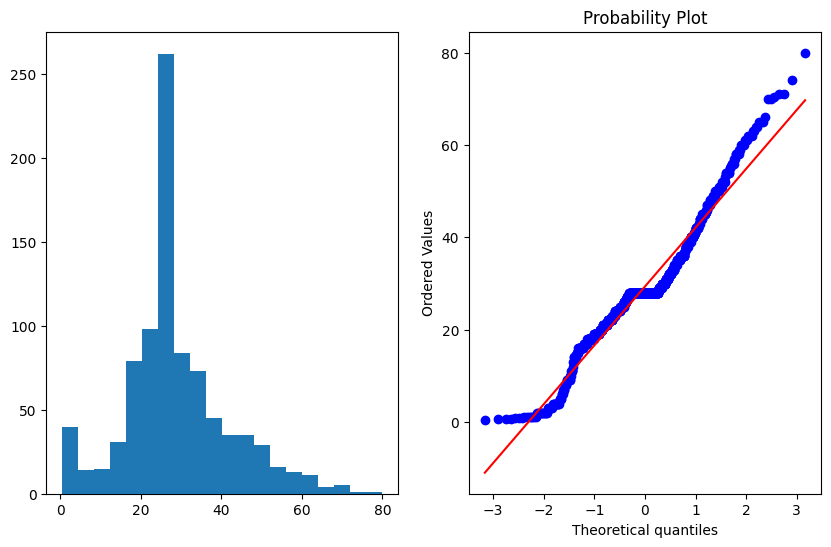

In [15]:
plot_data(df1,'Age')

Logarithmic Transformation.

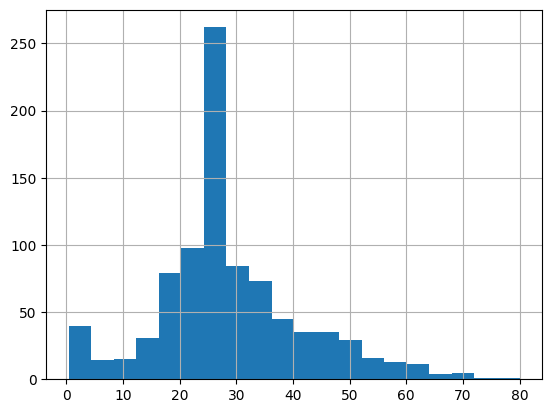

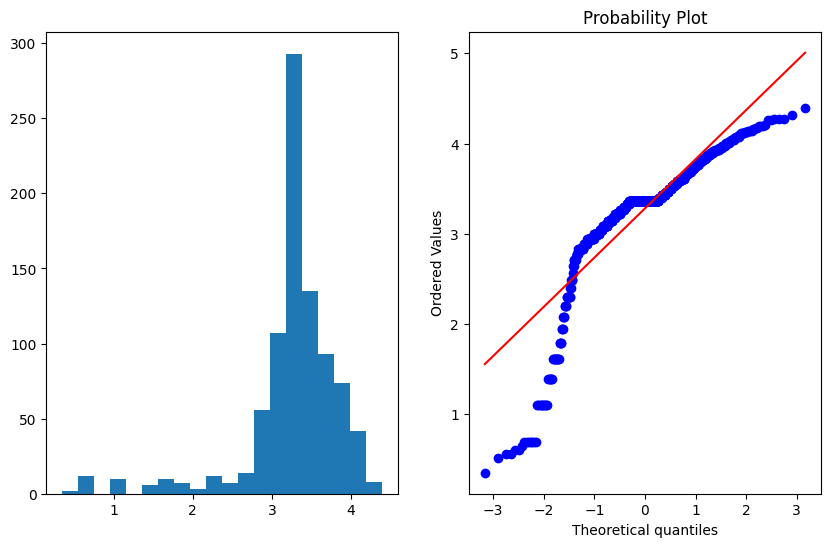

In [27]:
import numpy as np
df['Age_log'] = np.log1p(df['Age'])
df['Age'].hist(bins=20)
plot_data(df,'Age_log')

Reciprocal Transformation.

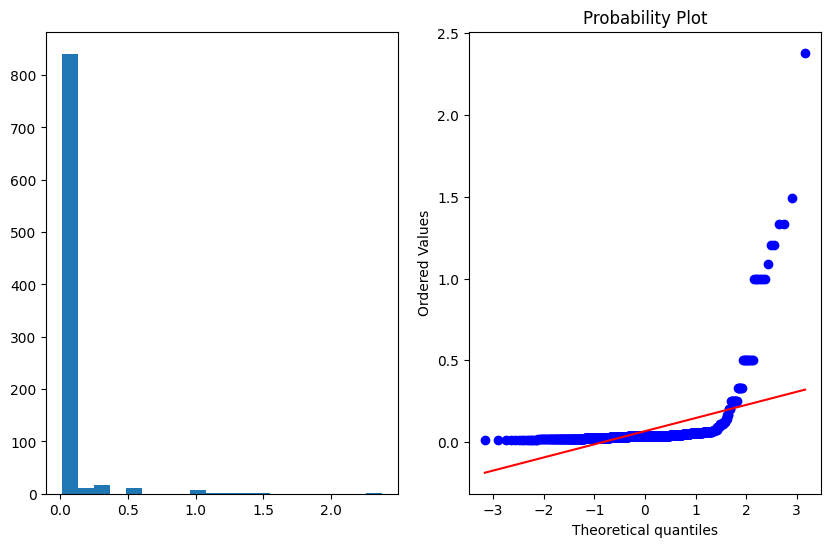

In [17]:
df1['Age_reciprocal'] = 1/df.Age
plot_data(df1,'Age_reciprocal')

Square Root Transformation.

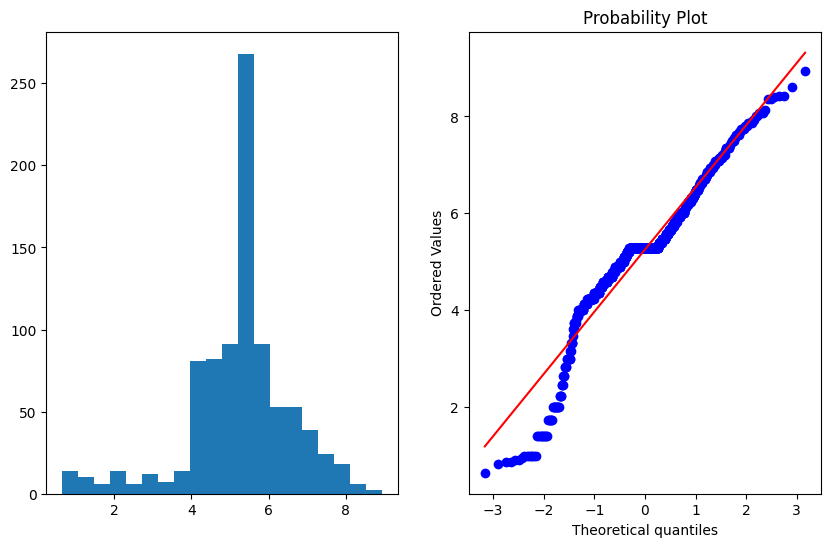

In [18]:
df1['Age_Square'] = df1.Age**(1/2)
plot_data(df1,'Age_Square')

### Box-Cox Transformation
The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [7]:
df['Age_boxcox'],parameter = stats.boxcox(df['Age'])

In [8]:
parameter

0.7964531473656952

In [10]:
df['Age_boxcox'].values

array([13.468119  , 21.4987284 , 15.56341683, 20.05611014, 20.05611014,
       16.58601436, 28.84746463,  0.92513402, 16.07664335,  9.01695462,
        2.53193075, 30.6104327 , 12.39181078, 21.97437834,  9.01695462,
       29.29062758,  0.92513402, 16.58601436, 18.09258499, 16.58601436,
       20.05611014, 19.56971919,  9.59722218, 16.58601436,  5.32265694,
       21.4987284 , 16.58601436, 11.84551333, 16.58601436, 16.58601436,
       22.44755196, 16.58601436, 16.58601436, 34.06447944, 16.58601436,
       23.38676361, 16.58601436, 12.93257404, 11.29332892,  9.01695462,
       22.44755196, 16.07664335, 16.58601436,  1.75636071, 11.84551333,
       16.58601436, 16.58601436, 16.58601436, 16.58601436, 11.29332892,
        4.65897047, 12.93257404, 26.60575762, 17.09169505, 33.6375945 ,
       16.58601436, 12.93257404, 16.83930618,  3.26857952,  7.221786  ,
       13.468119  , 21.4987284 , 24.77874367,  2.53193075, 16.58601436,
       16.58601436, 17.09169505, 11.84551333, 10.7348613 , 15.56

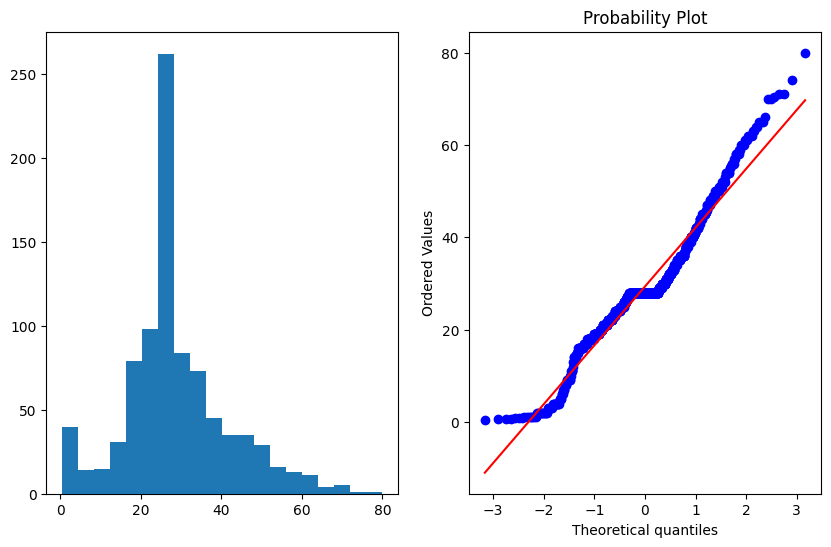

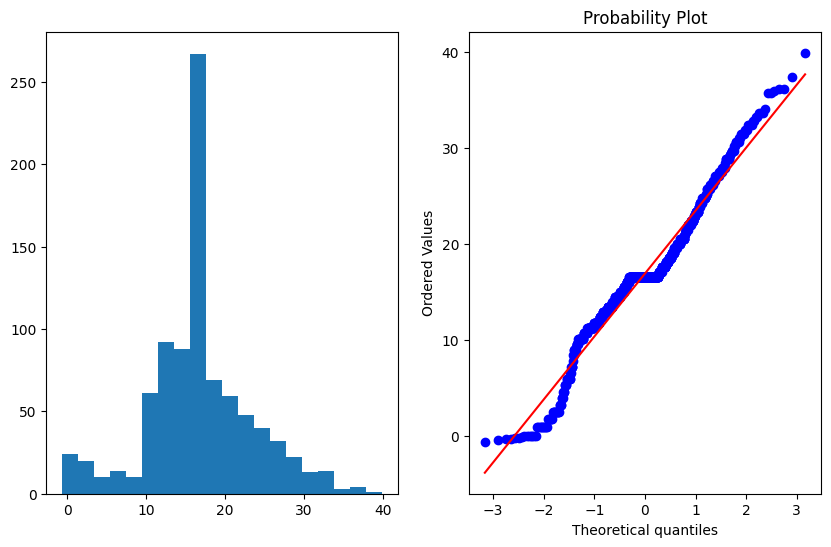

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_data(df,'Age')
plot_data(df,'Age_boxcox')

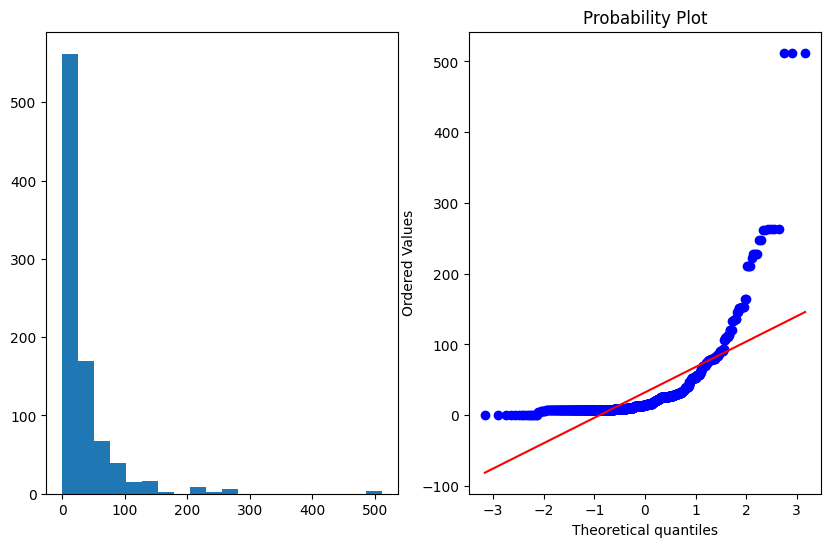

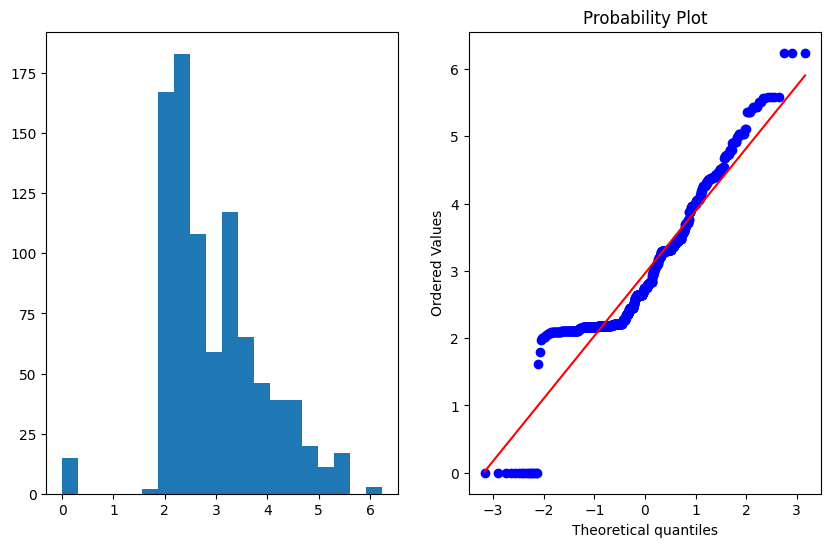

In [30]:
#### Fare.
import numpy as np
df['Fare_log'] = np.log1p(df['Fare'])
plot_data(df,'Fare')
plot_data(df,'Fare_log')

Observations:
1. Log transformation bring the values from left sckewed to right.
2. While Receprocal Transformation bring the values from right to left.

Note: if the data is already Normalized then go for standardization. other wise transformation.